# 3. How to train and test your network (CIFAR)

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.python.keras import Input, Model
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.datasets import mnist, cifar10
from tensorflow.python.keras.utils import to_categorical

# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [0]:
# set random seeds for more reproducible results
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(43)

In [0]:
# load dataset
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
if len(x_train.shape)==4:
    x_train = np.mean(x_train, axis=-1)
    x_test = np.mean(x_test, axis=-1)
train_size = len(y_train)
test_size = len(y_test)
xdim = x_train.shape[1]
ydim = x_train.shape[2]
print(x_train.dtype, y_train.dtype)

(50000, 32, 32, 3) (50000, 1)
float64 uint8


[[ 61.33333333  44.66666667  47.         ... 132.66666667 126.33333333
  125.        ]
 [ 18.66666667   0.           8.66666667 ...  88.66666667  84.
   88.66666667]
 [ 23.33333333   7.66666667  28.         ...  84.          84.66666667
   74.66666667]
 ...
 [158.         129.33333333 128.33333333 ... 121.          31.33333333
   35.66666667]
 [138.33333333 112.66666667 120.         ... 142.          64.33333333
   56.66666667]
 [145.66666667 130.33333333 136.         ... 180.         117.66666667
   95.66666667]]
[6]


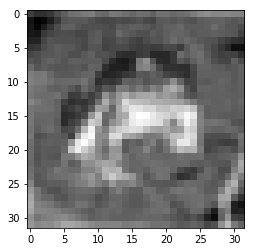

In [0]:
print(x_train[0])
print(y_train[0])
plt.imshow(x_train[0], cmap='gray')

In [0]:
print(np.min(x_train), np.max(x_train), np.median(x_train))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

0.0 255.0 116.33333333333333
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


In [0]:
n_classes = len(np.unique(y_test))
x_train, y_train = shuffle(x_train, y_train, random_state=44)
x_train = x_train.reshape((train_size, -1))/255
x_test = x_test.reshape((test_size, -1))/255
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [0]:
dropout_prob = 0.5

def get_model():
    inputs = Input(shape=(xdim*ydim,))
    f = Dense(1024, activation='relu')(inputs)
    f = Dropout(dropout_prob)(f)
    f = Dense(1024, activation='relu')(f)
    f = Dropout(dropout_prob)(f)
    f = Dense(256, activation='relu')(f)
    f = Dropout(dropout_prob)(f)
    outputs = Dense(n_classes, activation='softmax')(f)
    return Model(inputs=inputs, outputs=outputs)

In [0]:
model = get_model()
print(model.summary())
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=300, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

Epoch 108/300
40000/40000 [==============================] - 4s 93us/step - loss: 1.4408 - acc: 0.4824 - val_loss: 1.5402 - val_acc: 0.4563
Epoch 109/300
40000/40000 [==============================] - 4s 90us/step - loss: 1.4428 - acc: 0.4819 - val_loss: 1.5311 - val_acc: 0.4566
Epoch 110/300
40000/40000 [==============================] - 4s 98us/step - loss: 1.4418 - acc: 0.4841 - val_loss: 1.5288 - val_acc: 0.4572
Epoch 111/300
40000/40000 [==============================] - 4s 89us/step - loss: 1.4349 - acc: 0.4875 - val_loss: 1.5629 - val_acc: 0.4496
Epoch 112/300
40000/40000 [==============================] - 4s 90us/step - loss: 1.4295 - acc: 0.4859 - val_loss: 1.5351 - val_acc: 0.4581
Epoch 113/300
40000/40000 [==============================] - 4s 90us/step - loss: 1.4329 - acc: 0.4866 - val_loss: 1.5327 - val_acc: 0.4599
Epoch 114/300
40000/40000 [==============================] - 4s 95us/step - loss: 1.4270 - acc: 0.4903 - val_loss: 1.5358 - val_acc: 0.4562
Epoch 115/300
40000/

40000/40000 [==============================] - 4s 89us/step - loss: 1.1634 - acc: 0.5822 - val_loss: 1.5143 - val_acc: 0.4796
Epoch 225/300
40000/40000 [==============================] - 4s 97us/step - loss: 1.1574 - acc: 0.5848 - val_loss: 1.5251 - val_acc: 0.4752
Epoch 226/300
40000/40000 [==============================] - 4s 94us/step - loss: 1.1598 - acc: 0.5845 - val_loss: 1.5080 - val_acc: 0.4814
Epoch 227/300
40000/40000 [==============================] - 4s 96us/step - loss: 1.1567 - acc: 0.5874 - val_loss: 1.4984 - val_acc: 0.4827
Epoch 228/300
40000/40000 [==============================] - 4s 101us/step - loss: 1.1595 - acc: 0.5822 - val_loss: 1.5117 - val_acc: 0.4753
Epoch 229/300
40000/40000 [==============================] - 4s 91us/step - loss: 1.1464 - acc: 0.5902 - val_loss: 1.5157 - val_acc: 0.4784
Epoch 230/300
40000/40000 [==============================] - 4s 89us/step - loss: 1.1528 - acc: 0.5867 - val_loss: 1.5706 - val_acc: 0.4606
Epoch 231/300
40000/40000 [======

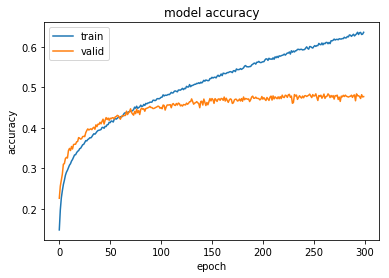

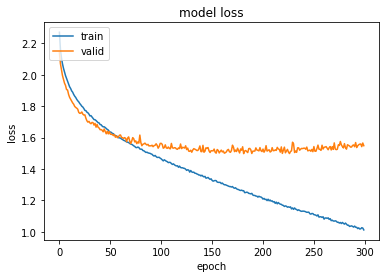

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
loss, acc = model.evaluate(x=x_test, y=y_test)
print(loss, acc)
targets = np.argmax(y_test, axis=-1)
probabilities = model.predict(x=x_test)
predictions = np.argmax(probabilities, axis=-1)
cm = confusion_matrix(y_true=targets, y_pred=predictions)
print(cm)

10000/10000 [==============================] - 1s 65us/step
1.517860437965393 0.4868
[[432  26  99   6 130  16  41  39 178  33]
 [ 23 613   7  26  33   7  65  18  84 124]
 [ 57  16 331  60 266  65 105  55  28  17]
 [ 28  25  72 257 163 146 167  74  23  45]
 [ 35  14  98  43 533  42 115  83  30   7]
 [ 20   8  84 163 143 375  78  92  16  21]
 [ 14  38  56  46 150  30 608  27  13  18]
 [ 22  14  35  38 141  61  32 619  17  21]
 [ 92  75  23  26  82  12  36  25 598  31]
 [ 21 171  24  28  43  12  59  60  80 502]]


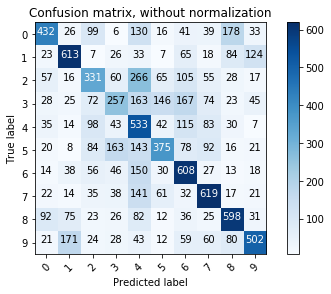

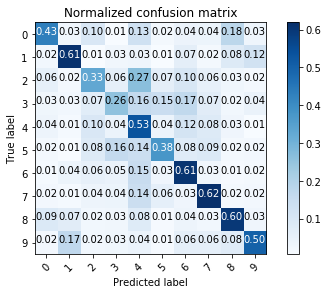

In [0]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    np.set_printoptions(precision=2)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

classes = np.arange(n_classes)
plot_confusion_matrix(cm, classes=classes)
plot_confusion_matrix(cm, classes=classes, normalize=True)

In [0]:
from sklearn.metrics import classification_report
report = classification_report(y_true=targets, y_pred=predictions, labels=classes)
print(report)

             precision    recall  f1-score   support

          0       0.58      0.43      0.50      1000
          1       0.61      0.61      0.61      1000
          2       0.40      0.33      0.36      1000
          3       0.37      0.26      0.30      1000
          4       0.32      0.53      0.40      1000
          5       0.49      0.38      0.42      1000
          6       0.47      0.61      0.53      1000
          7       0.57      0.62      0.59      1000
          8       0.56      0.60      0.58      1000
          9       0.61      0.50      0.55      1000

avg / total       0.50      0.49      0.48     10000



loss	index	true	predicted	probability
1.5566	9856	5	1		0.9963
1.3756	4754	3	0		0.4976
1.3518	8312	9	1		0.9987
1.3395	7778	0	6		0.9733
1.3337	7794	5	6		0.9876
1.3330	9213	2	7		0.9924
1.3060	3496	5	0		0.5116
1.2914	2323	8	1		0.9975
1.2685	6688	1	7		0.9751
1.2425	5498	9	1		0.9973


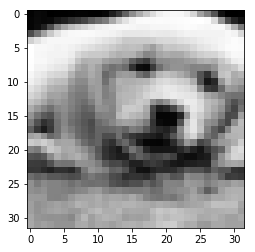

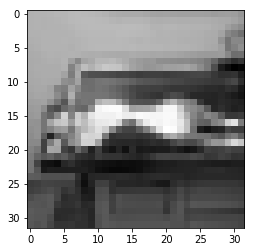

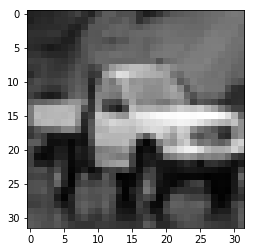

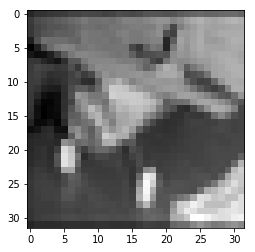

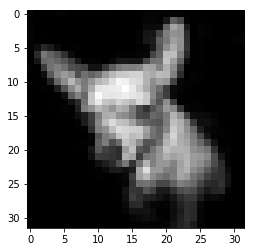

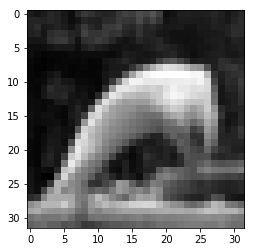

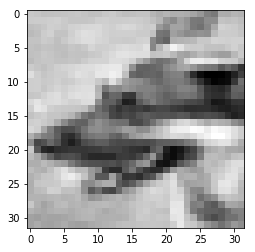

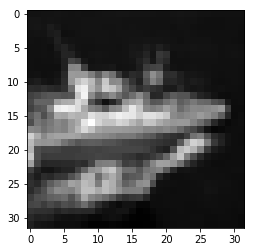

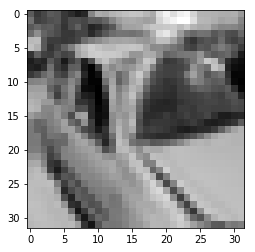

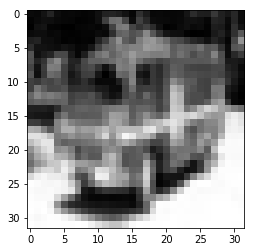

In [0]:
# top errors
from sklearn.metrics import log_loss
max_probs = np.max(probabilities, axis=-1)
losses = [log_loss(y_true=y, y_pred=prob, eps=1e-7) for y,prob in zip(y_test,probabilities)]
print('loss\tindex\ttrue\tpredicted\tprobability')
top_errors = sorted(list(zip(losses, np.arange(test_size), targets, predictions, max_probs)), reverse=True)[:10]
for error in top_errors:
    print('%.04f\t%d\t%d\t%d\t\t%.04f'%error)
    plt.figure()
    plt.imshow(x_test[error[1]].reshape((xdim, ydim)), cmap='gray')

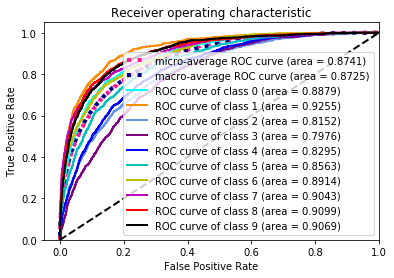

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'purple', 'b', 'c', 'y', 'm', 'r', 'k', 'g'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
# 1. overfit MNIST - get a very small training error
# 2. add dropout regularization for each FC layer, and improve generalization
# 3. evaluate on test and analyze top errors (largest per-sample logloss): ground truth, predicted, probability, images. what can be learned?
# 4. check sensitivity to random seed
# 5. bonus: fix keras classification_report() to show FPR
# 6. now do CIFAR-10 (look at the data, overfit, generalize, evaluate, etc):
# 6a. convert to gray-scale.
# 6b. make code general to work for any of MNIST, CIFAR-10, CIFAR-100 (no need to actually run on CIFAR-100)
# 6c. don't expect good results on CIFAR-10... try to get val_acc~0.5... try different network architetures